In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 


In [2]:
# IMport file here -->

df = pd.read_csv(r"C:\Users\HP\Desktop\Kaggle\Sample - Superstore.csv",encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
# converting date time string to date_time

df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])


In [8]:
#The dataset has an order date column. We can use this column to create new columns
#      like order month, order year, and order day, which will be very valuable for sales and profit analysis 
#      according to time periods.


df["Order month"] =df["Order Date"].dt.month             #--> extract month from Order Date
df["Order year"] = df["Order Date"].dt.year              #--> extract year from Order Date 
df["Order Day Of Week"] = df["Order Date"].dt.dayofweek  #--> extract dayofweek from Order Date

# Now Giving Answers to business problem statment-->

# Monthly Sales Analysis -->

In [ ]:
sales_by_month = df.groupby("Order month").Sales.sum().reset_index()
fig = px.line(sales_by_month,
              x="Order month",
              y="Sales",
              title='Monthly Sales Analysis')

fig.show()

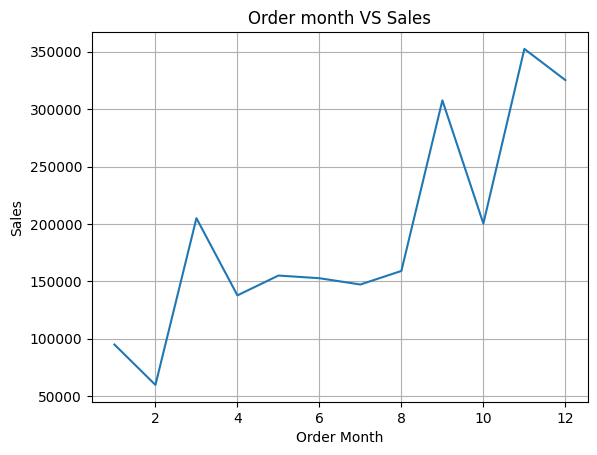

In [11]:
plt.plot("Order month","Sales",data=sales_by_month)
plt.xlabel("Order Month")
plt.ylabel("Sales")
plt.title("Order month VS Sales")
plt.grid()

# Here we cant to find sales according to product category & analyze which
# category has lowest sales & which one has the highest sales

In [16]:
sales_by_category = df.groupby("Category").Sales.sum().reset_index()
sales_by_category.head(

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


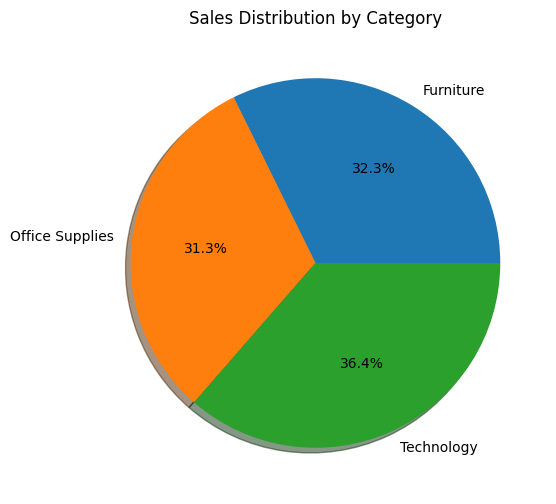

In [23]:
#Pie Chart-->
plt.figure(figsize=(6,6))
plt.pie(sales_by_category['Sales'], labels=sales_by_category['Category'], autopct='%1.1f%%', shadow=True)
plt.title("Sales Distribution by Category")
plt.show()

# Sales Analysis by Sub - Category -->

In [28]:
sales_by_subCategory = df.groupby("Sub-Category").Sales.sum().reset_index()
sales_by_subCategory.shape[0]

17

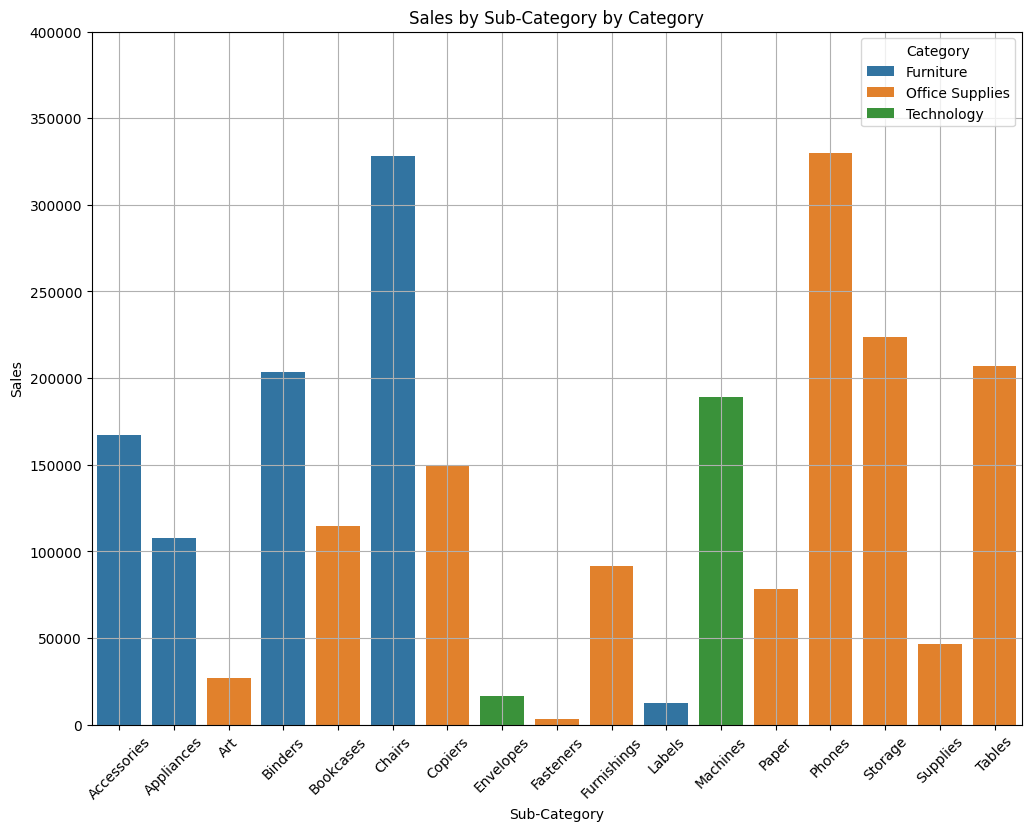

In [40]:
plt.figure(figsize=(12,9))
sns.barplot(x="Sub-Category", y="Sales", data=sales_by_subCategory,hue=df.Category)
plt.ylim(0, 400000)
plt.yticks(range(0, 400001, 50000))
plt.xticks(rotation=45)
plt.grid()
plt.title("Sales by Sub-Category by Category")
plt.show()

# Monthly Profit Analysis -->

In [42]:
profit_by_month = df.groupby("Order month").Profit.sum().reset_index()

In [43]:
profit_by_month.head()

,Order month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078


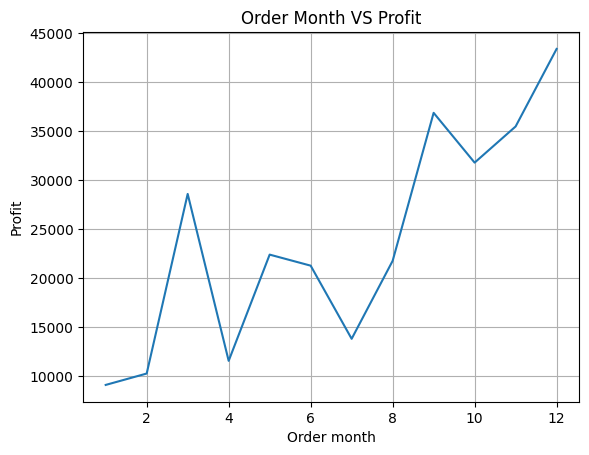

In [48]:
sns.lineplot(data=profit_by_month,x="Order month",y="Profit")
plt.title("Monthly profit Analysis ")
plt.grid()

# Analyze Profit by Category-->


In [49]:
profit_by_Category = df.groupby("Category").Profit.sum().reset_index()
profit_by_Category.head()

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


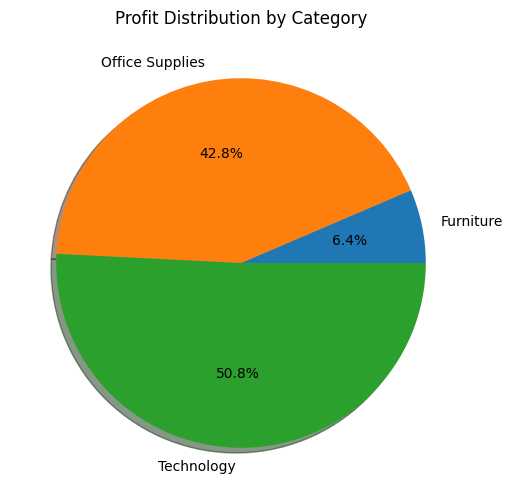

In [54]:
plt.figure(figsize=(6,6))
plt.pie(profit_by_Category['Profit'], labels=profit_by_Category['Category'], autopct='%1.1f%%', shadow=True)
plt.title("Profit Distribution by Category")
plt.show()

# Analyze Profit by Sub-Category-->

In [55]:
profit_by_SubCategory = df.groupby("Sub-Category").Profit.sum().reset_index()
profit_by_SubCategory.head()

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560


plt.figure(figsize=(12,9))
sns.barplot(x="Sub-Category", y="Profit", data=profit_by_SubCategory)
plt.xticks(rotation=45)
plt.title("Profit by Sub-Category")
plt.grid()
plt.show()

# Sales & Profot by Customer Segment -->

In [63]:
Sales_Profit_bySegment = df.groupby("Segment").agg({'Sales':'sum','Profit':'sum'}).reset_index()
Sales_Profit_bySegment.head()

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


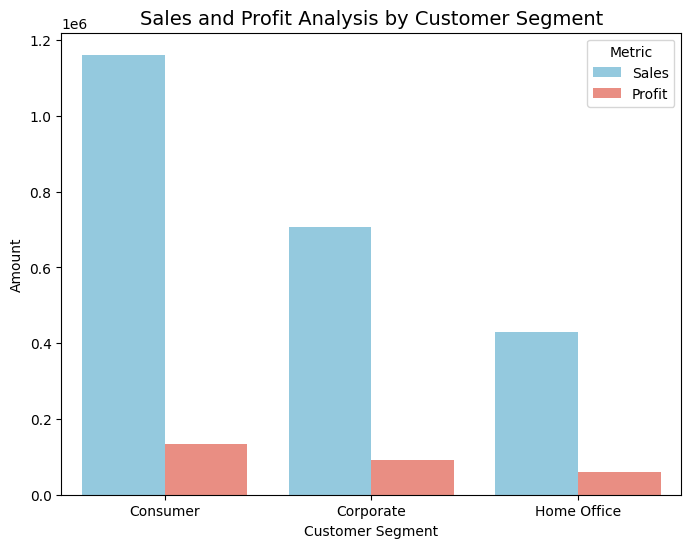

In [77]:
df_melted = Sales_Profit_bySegment.melt(id_vars="Segment", value_vars=["Sales", "Profit"], 
                                        var_name="Metric", value_name="Amount")

plt.figure(figsize=(8,6))
sns.barplot(x="Segment", y="Amount", hue="Metric", data=df_melted, palette=["skyblue","salmon"])
plt.title("Sales and Profit Analysis by Customer Segment", fontsize=14)
plt.xlabel("Customer Segment")
plt.ylabel("Amount")
plt.legend(title="Metric")
plt.show()

# Analyze Sales to Profit Ratio -->


In [79]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])



       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
